In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [119]:
%matplotlib notebook

In [120]:
#obtained from http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html
L = 1
T = 10000
dT = 2
Nx = 500
a = 0.0000001

In [149]:
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.arange(0, T, dT)    # mesh points in time
Nt = len(t)
F = a*dT/dx**2
u   = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1) 
du = np.zeros(Nx+1)
# u at the previous time level

# # Set initial condition u(x,0) = I(x)

u_1[250] = 1
u_1[150] = 0.5
u_1[450] = 1.5

In [152]:
for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        du[i] = F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
    du[0]=F*(u_1[Nx] - 2*u_1[0] + u_1[1])
    du[Nx]=F*(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])
    for i in range(0, Nx+1):
        u_1[i] = u_1[i] + du[i]
#     Insert boundary conditions
    u_1[0] = 0;  u_1[Nx] = 0
    
#     save z^2 
    Z = np.diff(u_1)/dx
    Z2 = Z*Z
    Z2tot[:,n]=Z2

 

In [153]:
# def odefunc(u, t):
#     du = np.zeros(Nx+1)

#     for n in range(0, Nt):
#     # Compute u at inner mesh points
#         for i in range(1, Nx):
#             du[i] = F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
#         du[0]=F*(u_1[Nx] - 2*u_1[0] + u_1[1])
#         du[Nx]=F*(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])
#         for i in range(0, Nx+1):
#             u_1[i] = u_1[i] + du[i]


#     return du


In [154]:
# sol = odeint(odefunc,u_1,Nt)

<IPython.core.display.Javascript object>


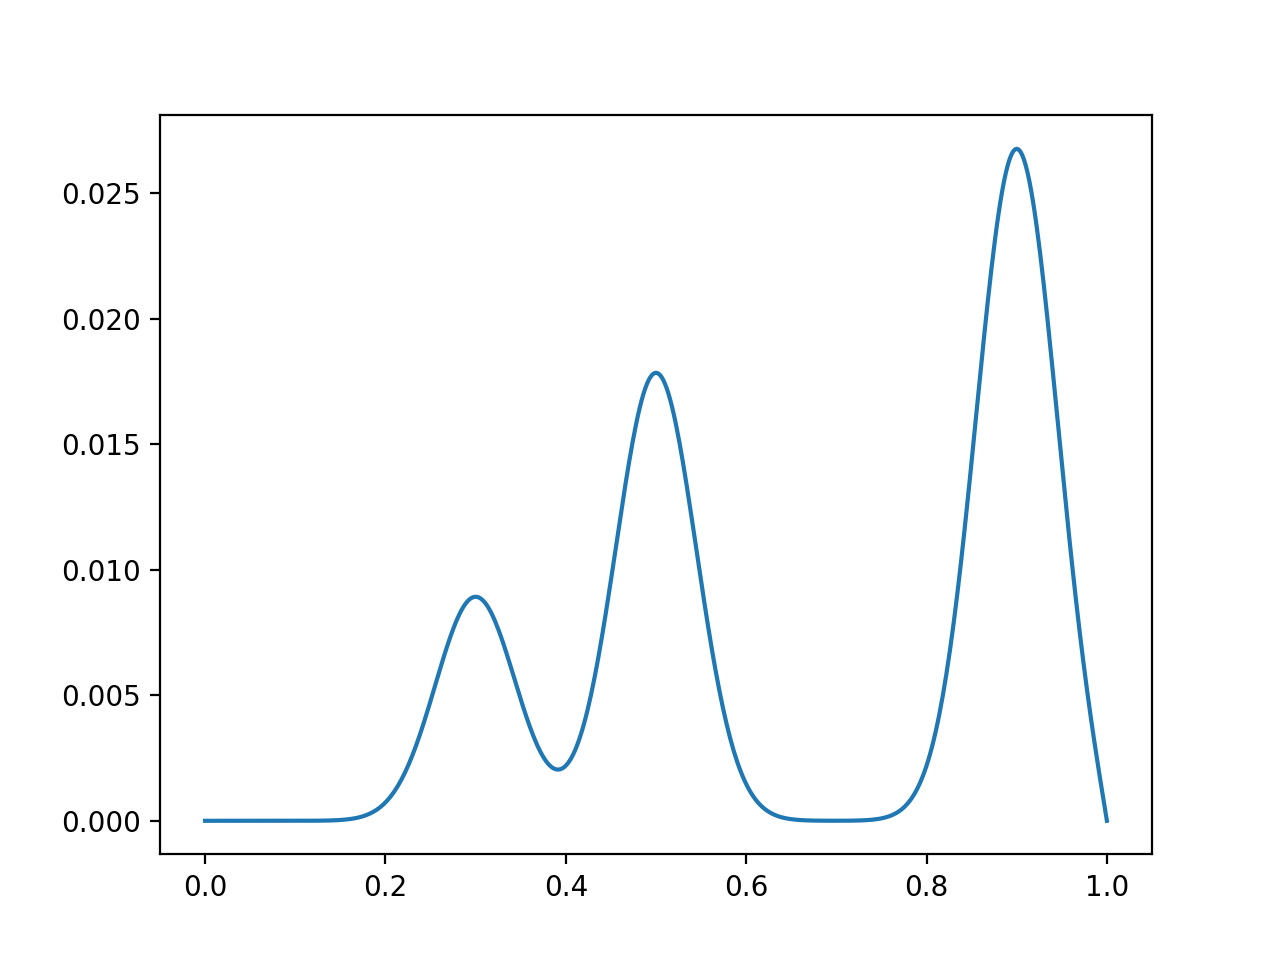

In [161]:
plt.figure()
plt.plot(x, u_1)

<IPython.core.display.Javascript object>


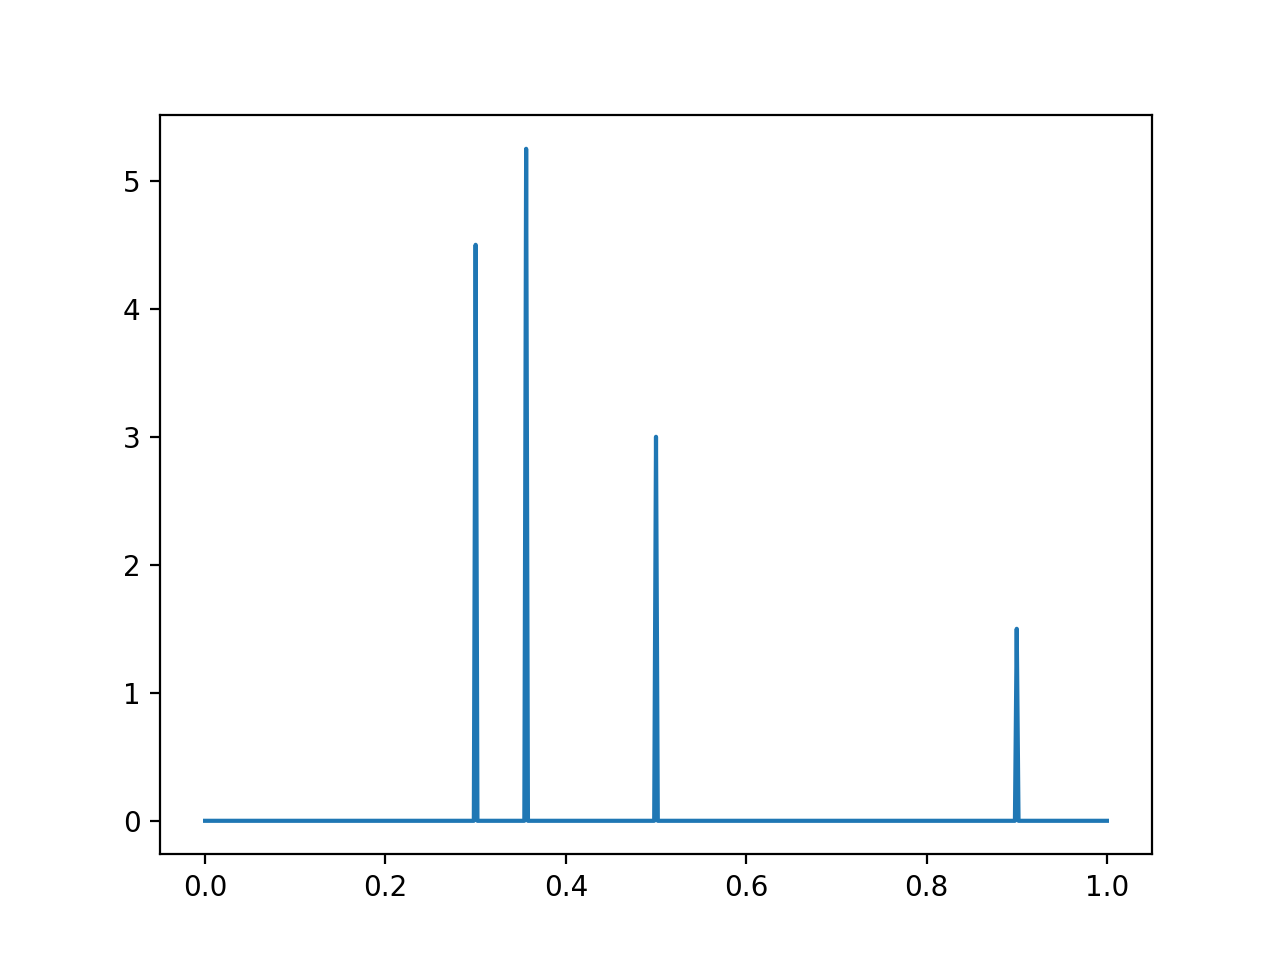

In [145]:
u_1 = sol[0,:]
u_1[450]+=0.5
u_1[150]+=1.5
u_1[250]+=1
u_1[178]+=1.75
plt.figure()
plt.plot(x, u_1)

In [146]:
# Z2tot = np.zeros((Nx, Nt))
# for n in range(0, Nt):
#     Z = np.diff(u_1)/dx
#     Z2 = Z*Z
#     Z2tot[:,n]=Z2

In [135]:
# a = []
# for i in range(500):
#     value = (x[0],sol[0,:])
#     sol[0,:] = sol[0,:] + dt
#     a.append(value)

# k = 0
# def animate(i):
#     global k
#     x = a[k]
#     k += 1
#     ax1.clear()
#     plt.plot(x0,x,color='cyan')
#     plt.grid(True)
#     plt.ylim([-2,2])
#     plt.xlim([-pi,pi])
    
# anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
# plt.show()

In [156]:
Z2totSize = np.size(Z2tot)
Z2tot_long = np.reshape(Z2tot, Z2totSize)
print(np.shape(Z2tot_long))
print(Z2tot)

(2500000,)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.48639298e-19
    2.50705708e-19   2.52788438e-19]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.91592262e-19
    2.93997225e-19   2.96421032e-19]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.91617774e-19
    3.94805123e-19   3.98017105e-19]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.93862949e-02
    4.94052223e-02   4.94241438e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.86128673e-02
    4.86320319e-02   4.86511907e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.82265172e-02
    4.82457981e-02   4.82650732e-02]]


In [157]:
# plt.figure()
# plt.plot(x[1:], Z2)
goodindicies = np.argwhere(Z2tot_long>.000001)
#Z2[goodindicies]

In [158]:
#goodindicies

In [159]:
mybins = np.linspace(0,.004,10)
counts, bins = np.histogram(Z2tot_long[goodindicies],mybins)
print(counts)
print(bins)

[293215  52387  34483  26597  21783  19224  16892  14608  13865]
[ 0.          0.00044444  0.00088889  0.00133333  0.00177778  0.00222222
  0.00266667  0.00311111  0.00355556  0.004     ]


<IPython.core.display.Javascript object>


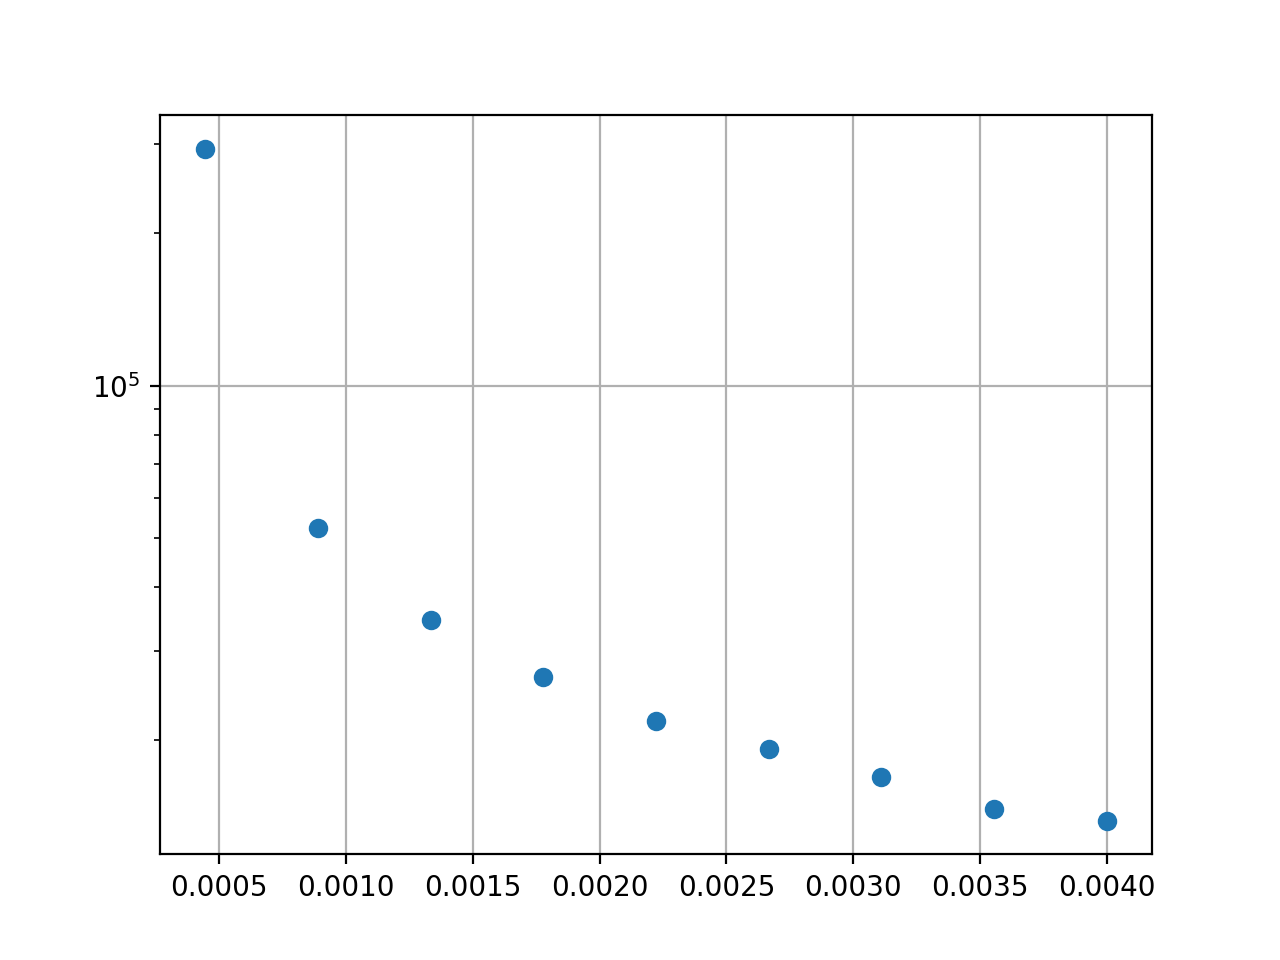

In [160]:
plt.figure()
plt.semilogy(bins[1:], counts, 'o')
plt.grid(True)